## Result 7: VSI at the locations of transcripts from markers
Evaluate VSI at the locations of transcripts from these markers.  
- across tissue section  
- within cells  
- within MOD cells  
- within MOD_wm cells  
- within MOD_gm cells

In [42]:
from pathlib import Path

import sys
import os
sys.path.append(os.path.abspath("../src"))

import importlib
import utils
import plot

importlib.reload(utils)
importlib.reload(plot)

from utils import load_merfish_signal_df, load_banksy_result, load_merfish_data, load_boundaries_data
from utils import marker_transcripts_vsi, extract_cell_vsi
from plot import plot_marker_vsi_hist, CM, SAVE_FIG

import matplotlib.pyplot as plt
import numpy as np

In [36]:
fig_path = Path("../data/results/R7")

### data

#### Signals in the Tissue Section

In [2]:
MERFISH_data_folder_path = Path("../data/mouse_hypothalamus/MERFISH/")

In [3]:
signal_coordinate_df, coordinate_x_m, coordinate_y_m = load_merfish_signal_df(MERFISH_data_folder_path/"merfish_barcodes_example.csv")

#### Results of Ovrlpy

results:  
- signal integrity  
- signal strength  

In [4]:
ovrlpy_result_folder = Path("../data/results/VSI/")
signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity.txt")
signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength.txt")

In [5]:
# exclude MOD marker signals
nonMOD_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD.txt")
nonMOD_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD.txt")

In [7]:
# exclude MOD marker signals
nonMOD_wm_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD1.txt")
nonMOD_wm_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD1.txt")

In [8]:
# exclude MOD marker signals
nonMOD_gm_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD2.txt")
nonMOD_gm_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD2.txt")

#### Results of BANKSY

In [9]:
banksy_folder_path = Path("../data/banksy_results/")

In [10]:
banksy_result = load_banksy_result(banksy_folder_path/"banksy_cluster.txt", coordinate_x_m, coordinate_y_m)

#### Segmentation Dataset

In [11]:
merfish_data = load_merfish_data(MERFISH_data_folder_path / "merfish_all_cells.csv", 
                                 banksy_result, coordinate_x_m, coordinate_y_m, 
                                 animal_id=1, bregma_value=-0.24)

#### Cell boundaries

In [12]:
boundaries_df = load_boundaries_data(MERFISH_data_folder_path/'cellboundaries_example_animal.csv', 
                                     merfish_data, coordinate_x_m, coordinate_y_m)

#### Marker Genes

differentially expressed genes identified by BANKSY

In [13]:
# all differentially expressed genes
DE_genes = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3', 'Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']
# DE_genes_MOD_gm
DE_genes_MOD_gm = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3']
# DE_genes_MOD_wm
DE_genes_MOD_wm = ['Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']

In [14]:
MOD_boundaries = boundaries_df[(boundaries_df['banksy'] == 7) | (boundaries_df['banksy'] == 8)]
MOD_wm_boundaries = boundaries_df[boundaries_df['banksy'] == 7]
MOD_gm_boundaries = boundaries_df[boundaries_df['banksy'] == 8]

### VSI at marker transcripts

#### Markers vsi across tissue section

In [15]:
Gad1_strength, Gad1_integrity = marker_transcripts_vsi(signal_coordinate_df, signal_strength, signal_integrity, ['Gad1'])

In [16]:
Plin3_strength, Plin3_integrity = marker_transcripts_vsi(signal_coordinate_df, signal_strength, signal_integrity, ['Plin3'])

In [17]:
Gjc3_strength, Gjc3_integrity = marker_transcripts_vsi(signal_coordinate_df, signal_strength, signal_integrity, ['Gjc3'])

In [18]:
Dgkk_strength, Dgkk_integrity = marker_transcripts_vsi(signal_coordinate_df, signal_strength, signal_integrity, ['Dgkk'])

In [19]:
Cbln2_strength, Cbln2_integrity = marker_transcripts_vsi(signal_coordinate_df, signal_strength, signal_integrity, ['Cbln2'])

In [20]:
Syt4_strength, Syt4_integrity = marker_transcripts_vsi(signal_coordinate_df, signal_strength, signal_integrity, ['Syt4'])

In [21]:
Mlc1_strength, Mlc1_integrity = marker_transcripts_vsi(signal_coordinate_df, signal_strength, signal_integrity, ['Mlc1'])

In [22]:
Lpar1_strength, Lpar1_integrity = marker_transcripts_vsi(signal_coordinate_df, signal_strength, signal_integrity, ['Lpar1'])

#### VSI Distribution across the Tissue Section

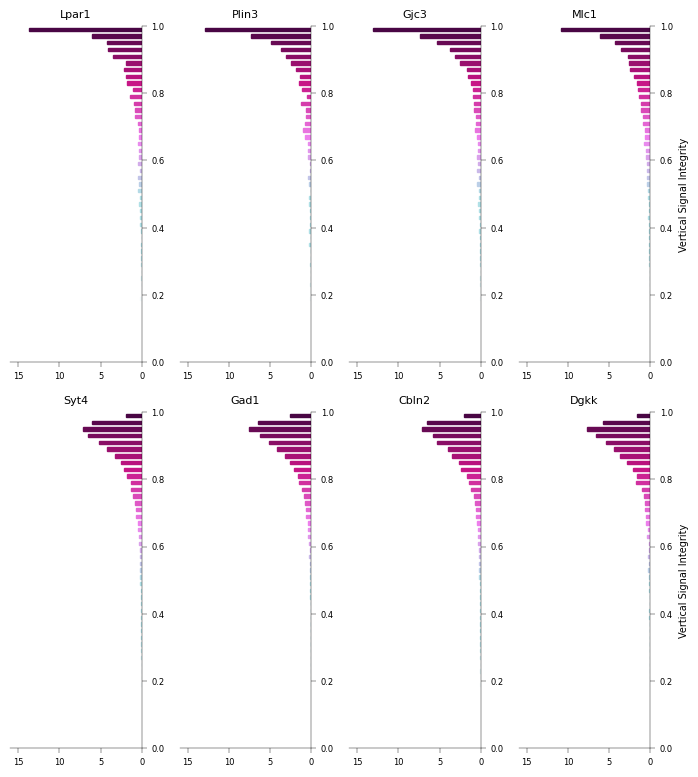

In [52]:
fig, ax = plt.subplots(2, 4, figsize=(18*CM, 20*CM))
ax = ax.flatten()
plot_marker_vsi_hist(ax[0], Lpar1_integrity, Lpar1_strength, signal_thr=3, label="Lpar1", xlim=(0,16), log=False)
plot_marker_vsi_hist(ax[1], Plin3_integrity, Plin3_strength, signal_thr=3, label="Plin3", xlim=(0,16), log=False)
plot_marker_vsi_hist(ax[2], Gjc3_integrity, Gjc3_strength, signal_thr=3, label="Gjc3", xlim=(0,16), log=False)
plot_marker_vsi_hist(ax[3], Mlc1_integrity, Mlc1_strength, signal_thr=3, label="Mlc1", xlim=(0,16), log=False, ylabel=True)
plot_marker_vsi_hist(ax[4], Syt4_integrity, Syt4_strength, signal_thr=3, label="Syt4", xlim=(0,16), log=False)
plot_marker_vsi_hist(ax[5], Gad1_integrity, Gad1_strength, signal_thr=3, label="Gad1", xlim=(0,16), log=False)
plot_marker_vsi_hist(ax[6], Cbln2_integrity, Cbln2_strength, signal_thr=3, label="Cbln2", xlim=(0,16), log=False)
plot_marker_vsi_hist(ax[7], Dgkk_integrity, Dgkk_strength, signal_thr=3, label="Dgkk", xlim=(0,16), log=False, ylabel=True)

plt.tight_layout()
plt.show()

### Marker VSI in cell

#### extract vsi

In [25]:
cell_si, cell_ss = extract_cell_vsi(boundary_df=boundaries_df, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
cell_si_nonMOD_wm, cell_ss_nonMOD_wm = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD_wm_signal_integrity, strength=nonMOD_wm_signal_strength, integrity_size=1800)
cell_si_nonMOD_gm, cell_ss_nonMOD_gm = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD_gm_signal_integrity, strength=nonMOD_gm_signal_strength, integrity_size=1800)
cell_si_nonMOD, cell_ss_nonMOD = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

In [26]:
MOD_si, MOD_ss = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD_si_nonMOD_wm, MOD_ss_nonMOD_wm = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD_wm_signal_integrity, strength=nonMOD_wm_signal_strength, integrity_size=1800)
MOD_si_nonMOD_gm, MOD_ss_nonMOD_gm = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD_gm_signal_integrity, strength=nonMOD_gm_signal_strength, integrity_size=1800)
MOD_si_nonMOD, MOD_ss_nonMOD = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

In [27]:
MOD_wm_si, MOD_wm_ss = extract_cell_vsi(boundary_df=MOD_wm_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD_wm_si_nonMOD_wm, MOD_wm_ss_nonMOD_wm = extract_cell_vsi(boundary_df=MOD_wm_boundaries, integrity=nonMOD_wm_signal_integrity, strength=nonMOD_wm_signal_strength, integrity_size=1800)
MOD_wm_si_nonMOD_gm, MOD_wm_ss_nonMOD_gm = extract_cell_vsi(boundary_df=MOD_wm_boundaries, integrity=nonMOD_gm_signal_integrity, strength=nonMOD_gm_signal_strength, integrity_size=1800)
MOD_wm_si_nonMOD, MOD_wm_ss_nonMOD = extract_cell_vsi(boundary_df=MOD_wm_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

In [28]:
MOD_gm_si, MOD_gm_ss = extract_cell_vsi(boundary_df=MOD_gm_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD_gm_si_nonMOD_wm, MOD_gm_ss_nonMOD_wm = extract_cell_vsi(boundary_df=MOD_gm_boundaries, integrity=nonMOD_wm_signal_integrity, strength=nonMOD_wm_signal_strength, integrity_size=1800)
MOD_gm_si_nonMOD_gm, MOD_gm_ss_nonMOD_gm = extract_cell_vsi(boundary_df=MOD_gm_boundaries, integrity=nonMOD_gm_signal_integrity, strength=nonMOD_gm_signal_strength, integrity_size=1800)
MOD_gm_si_nonMOD, MOD_gm_ss_nonMOD = extract_cell_vsi(boundary_df=MOD_gm_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

In [29]:
Gad1_cell_ss, Gad1_cell_si = marker_transcripts_vsi(signal_coordinate_df, cell_ss, cell_si, ['Gad1'])
Plin3_cell_ss, Plin3_cell_si = marker_transcripts_vsi(signal_coordinate_df, cell_ss, cell_si, ['Plin3'])
Gjc3_cell_ss, Gjc3_cell_si = marker_transcripts_vsi(signal_coordinate_df, cell_ss, cell_si, ['Gjc3'])
Dgkk_cell_ss, Dgkk_cell_si = marker_transcripts_vsi(signal_coordinate_df, cell_ss, cell_si, ['Dgkk'])
Cbln2_cell_ss, Cbln2_cell_si = marker_transcripts_vsi(signal_coordinate_df, cell_ss, cell_si, ['Cbln2'])
Syt4_cell_ss, Syt4_cell_si = marker_transcripts_vsi(signal_coordinate_df, cell_ss, cell_si, ['Syt4'])
Mlc1_cell_ss, Mlc1_cell_si = marker_transcripts_vsi(signal_coordinate_df, cell_ss, cell_si, ['Mlc1'])
Lpar1_cell_ss, Lpar1_cell_si = marker_transcripts_vsi(signal_coordinate_df, cell_ss, cell_si, ['Lpar1'])

In [30]:
Gad1_MOD_ss, Gad1_MOD_si = marker_transcripts_vsi(signal_coordinate_df, MOD_ss, MOD_si, ['Gad1'])
Plin3_MOD_ss, Plin3_MOD_si = marker_transcripts_vsi(signal_coordinate_df, MOD_ss, MOD_si, ['Plin3'])
Gjc3_MOD_ss, Gjc3_MOD_si = marker_transcripts_vsi(signal_coordinate_df, MOD_ss, MOD_si, ['Gjc3'])
Dgkk_MOD_ss, Dgkk_MOD_si = marker_transcripts_vsi(signal_coordinate_df, MOD_ss, MOD_si, ['Dgkk'])
Cbln2_MOD_ss, Cbln2_MOD_si = marker_transcripts_vsi(signal_coordinate_df, MOD_ss, MOD_si, ['Cbln2'])
Syt4_MOD_ss, Syt4_MOD_si = marker_transcripts_vsi(signal_coordinate_df, MOD_ss, MOD_si, ['Syt4'])
Mlc1_MOD_ss, Mlc1_MOD_si = marker_transcripts_vsi(signal_coordinate_df, MOD_ss, MOD_si, ['Mlc1'])
Lpar1_MOD_ss, Lpar1_MOD_si = marker_transcripts_vsi(signal_coordinate_df, MOD_ss, MOD_si, ['Lpar1'])

In [31]:
Gad1_MOD_wm_ss, Gad1_MOD_wm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_wm_ss, MOD_wm_si, ['Gad1'])
Plin3_MOD_wm_ss, Plin3_MOD_wm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_wm_ss, MOD_wm_si, ['Plin3'])
Gjc3_MOD_wm_ss, Gjc3_MOD_wm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_wm_ss, MOD_wm_si, ['Gjc3'])
Dgkk_MOD_wm_ss, Dgkk_MOD_wm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_wm_ss, MOD_wm_si, ['Dgkk'])
Cbln2_MOD_wm_ss, Cbln2_MOD_wm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_wm_ss, MOD_wm_si, ['Cbln2'])
Syt4_MOD_wm_ss, Syt4_MOD_wm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_wm_ss, MOD_wm_si, ['Syt4'])
Mlc1_MOD_wm_ss, Mlc1_MOD_wm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_wm_ss, MOD_wm_si, ['Mlc1'])
Lpar1_MOD_wm_ss, Lpar1_MOD_wm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_wm_ss, MOD_wm_si, ['Lpar1'])

In [32]:
Gad1_MOD_gm_ss, Gad1_MOD_gm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_gm_ss, MOD_gm_si, ['Gad1'])
Plin3_MOD_gm_ss, Plin3_MOD_gm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_gm_ss, MOD_gm_si, ['Plin3'])
Gjc3_MOD_gm_ss, Gjc3_MOD_gm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_gm_ss, MOD_gm_si, ['Gjc3'])
Dgkk_MOD_gm_ss, Dgkk_MOD_gm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_gm_ss, MOD_gm_si, ['Dgkk'])
Cbln2_MOD_gm_ss, Cbln2_MOD_gm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_gm_ss, MOD_gm_si, ['Cbln2'])
Syt4_MOD_gm_ss, Syt4_MOD_gm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_gm_ss, MOD_gm_si, ['Syt4'])
Mlc1_MOD_gm_ss, Mlc1_MOD_gm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_gm_ss, MOD_gm_si, ['Mlc1'])
Lpar1_MOD_gm_ss, Lpar1_MOD_gm_si = marker_transcripts_vsi(signal_coordinate_df, MOD_gm_ss, MOD_gm_si, ['Lpar1'])

#### Cells distribution

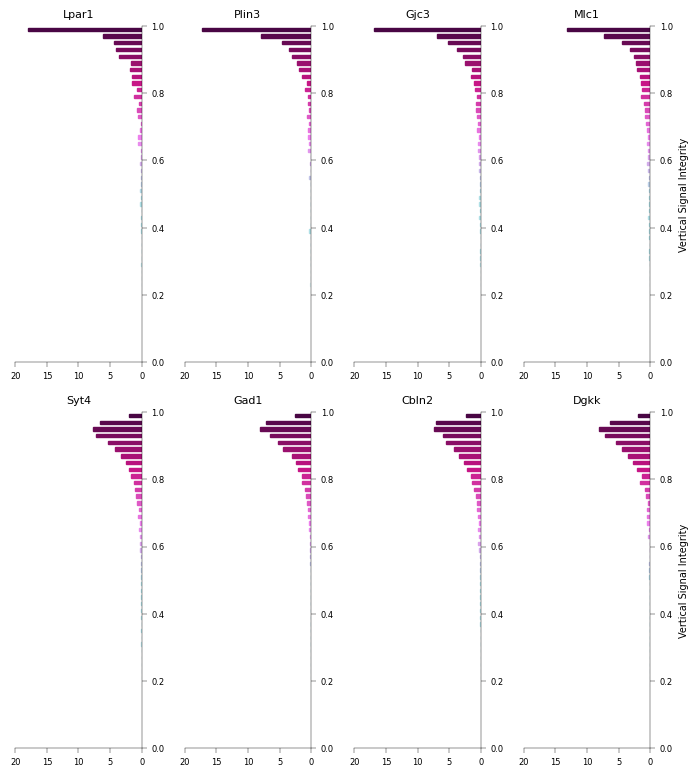

In [53]:
fig, ax = plt.subplots(2, 4, figsize=(18*CM, 20*CM))
ax = ax.flatten()
plot_marker_vsi_hist(ax[0], Lpar1_cell_si, Lpar1_cell_ss, signal_thr=3, label="Lpar1", xlim=(0,20), log=False)
plot_marker_vsi_hist(ax[1], Plin3_cell_si, Plin3_cell_ss, signal_thr=3, label="Plin3", xlim=(0,20), log=False)
plot_marker_vsi_hist(ax[2], Gjc3_cell_si, Gjc3_cell_ss, signal_thr=3, label="Gjc3", xlim=(0,20), log=False)
plot_marker_vsi_hist(ax[3], Mlc1_cell_si, Mlc1_cell_ss, signal_thr=3, label="Mlc1", xlim=(0,20), log=False, ylabel=True)
plot_marker_vsi_hist(ax[4], Syt4_cell_si, Syt4_cell_ss, signal_thr=3, label="Syt4", xlim=(0,20), log=False)
plot_marker_vsi_hist(ax[5], Gad1_cell_si, Gad1_cell_ss, signal_thr=3, label="Gad1", xlim=(0,20), log=False)
plot_marker_vsi_hist(ax[6], Cbln2_cell_si, Cbln2_cell_ss, signal_thr=3, label="Cbln2", xlim=(0,20), log=False)
plot_marker_vsi_hist(ax[7], Dgkk_cell_si, Dgkk_cell_ss, signal_thr=3, label="Dgkk", xlim=(0,20), log=False, ylabel=True)

plt.tight_layout()
plt.savefig(fig_path/"MarkerVSI_cell.png", **SAVE_FIG)
plt.show()

#### MOD distribution

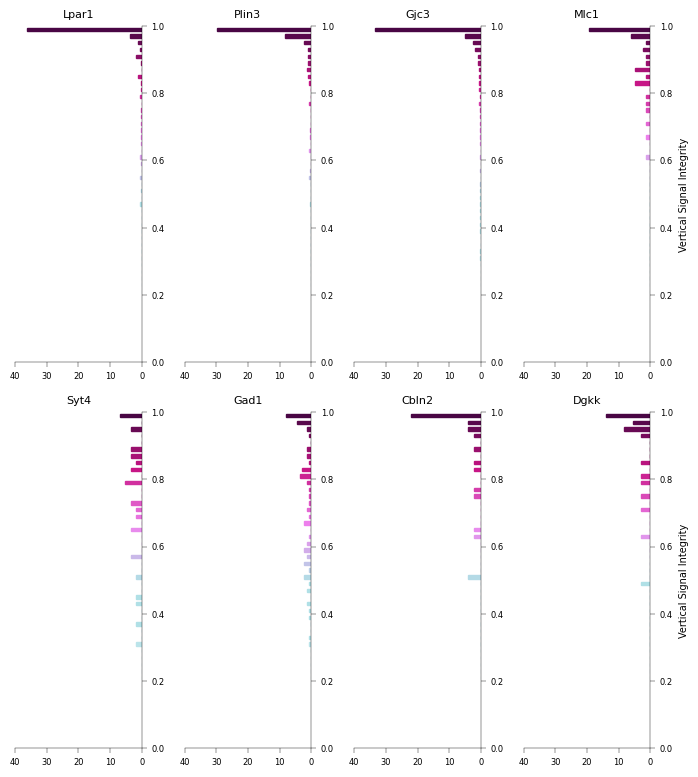

In [54]:
fig, ax = plt.subplots(2, 4, figsize=(18*CM, 20*CM))
ax = ax.flatten()
plot_marker_vsi_hist(ax[0], Lpar1_MOD_si, Lpar1_MOD_ss, signal_thr=3, label="Lpar1", xlim=(0,40), log=False)
plot_marker_vsi_hist(ax[1], Plin3_MOD_si, Plin3_MOD_ss, signal_thr=3, label="Plin3", xlim=(0,40), log=False)
plot_marker_vsi_hist(ax[2], Gjc3_MOD_si, Gjc3_MOD_ss, signal_thr=3, label="Gjc3", xlim=(0,40), log=False)
plot_marker_vsi_hist(ax[3], Mlc1_MOD_si, Mlc1_MOD_ss, signal_thr=3, label="Mlc1", xlim=(0,40), log=False, ylabel=True)
plot_marker_vsi_hist(ax[4], Syt4_MOD_si, Syt4_MOD_ss, signal_thr=3, label="Syt4", xlim=(0,40), log=False)
plot_marker_vsi_hist(ax[5], Gad1_MOD_si, Gad1_MOD_ss, signal_thr=3, label="Gad1", xlim=(0,40), log=False)
plot_marker_vsi_hist(ax[6], Cbln2_MOD_si, Cbln2_MOD_ss, signal_thr=3, label="Cbln2", xlim=(0,40), log=False)
plot_marker_vsi_hist(ax[7], Dgkk_MOD_si, Dgkk_MOD_ss, signal_thr=3, label="Dgkk", xlim=(0,40), log=False, ylabel=True)

plt.tight_layout()
plt.savefig(fig_path/"MarkerVSI_MODs.png", **SAVE_FIG)
plt.show()

#### MOD_wm distribution

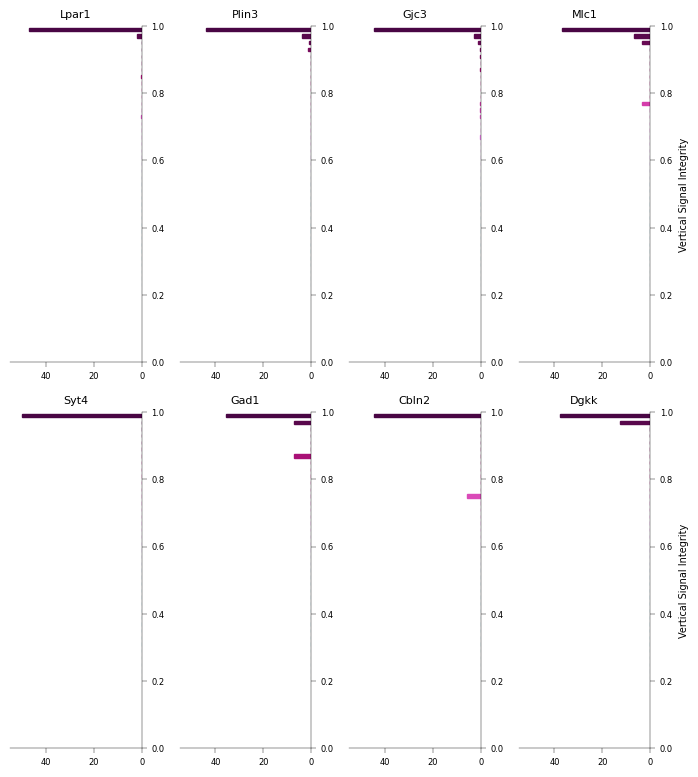

In [57]:
fig, ax = plt.subplots(2, 4, figsize=(18*CM, 20*CM))
ax = ax.flatten()
plot_marker_vsi_hist(ax[0], Lpar1_MOD_wm_si, Lpar1_MOD_wm_ss, signal_thr=3, label="Lpar1", xlim=(0,55), log=False)
plot_marker_vsi_hist(ax[1], Plin3_MOD_wm_si, Plin3_MOD_wm_ss, signal_thr=3, label="Plin3", xlim=(0,55), log=False)
plot_marker_vsi_hist(ax[2], Gjc3_MOD_wm_si, Gjc3_MOD_wm_ss, signal_thr=3, label="Gjc3", xlim=(0,55), log=False)
plot_marker_vsi_hist(ax[3], Mlc1_MOD_wm_si, Mlc1_MOD_wm_ss, signal_thr=3, label="Mlc1", xlim=(0,55), log=False, ylabel=True)
plot_marker_vsi_hist(ax[4], Syt4_MOD_wm_si, Syt4_MOD_wm_ss, signal_thr=3, label="Syt4", xlim=(0,55), log=False)
plot_marker_vsi_hist(ax[5], Gad1_MOD_wm_si, Gad1_MOD_wm_ss, signal_thr=3, label="Gad1", xlim=(0,55), log=False)
plot_marker_vsi_hist(ax[6], Cbln2_MOD_wm_si, Cbln2_MOD_wm_ss, signal_thr=3, label="Cbln2", xlim=(0,55), log=False)
plot_marker_vsi_hist(ax[7], Dgkk_MOD_wm_si, Dgkk_MOD_wm_ss, signal_thr=3, label="Dgkk", xlim=(0,55), log=False, ylabel=True)
plt.tight_layout()
plt.savefig(fig_path/"MarkerVSI_MODwm.png", **SAVE_FIG)
plt.show()

#### MOD_gm distribution

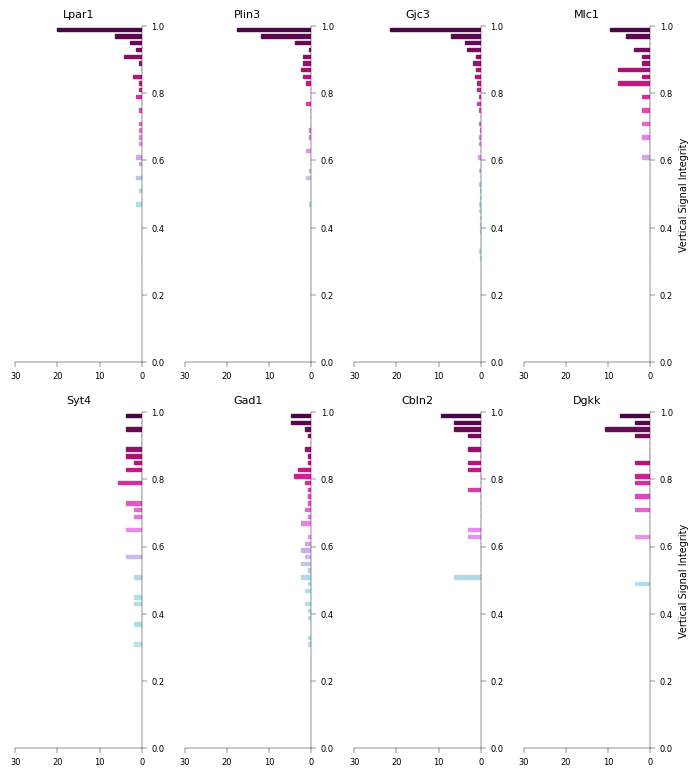

In [58]:
fig, ax = plt.subplots(2, 4, figsize=(18*CM, 20*CM))
ax = ax.flatten()
plot_marker_vsi_hist(ax[0], Lpar1_MOD_gm_si, Lpar1_MOD_gm_ss, signal_thr=3, label="Lpar1", xlim=(0,30), log=False)
plot_marker_vsi_hist(ax[1], Plin3_MOD_gm_si, Plin3_MOD_gm_ss, signal_thr=3, label="Plin3", xlim=(0,30), log=False)
plot_marker_vsi_hist(ax[2], Gjc3_MOD_gm_si, Gjc3_MOD_gm_ss, signal_thr=3, label="Gjc3", xlim=(0,30), log=False)
plot_marker_vsi_hist(ax[3], Mlc1_MOD_gm_si, Mlc1_MOD_gm_ss, signal_thr=3, label="Mlc1", xlim=(0,30), log=False, ylabel=True)
plot_marker_vsi_hist(ax[4], Syt4_MOD_gm_si, Syt4_MOD_gm_ss, signal_thr=3, label="Syt4", xlim=(0,30), log=False)
plot_marker_vsi_hist(ax[5], Gad1_MOD_gm_si, Gad1_MOD_gm_ss, signal_thr=3, label="Gad1", xlim=(0,30), log=False)
plot_marker_vsi_hist(ax[6], Cbln2_MOD_gm_si, Cbln2_MOD_gm_ss, signal_thr=3, label="Cbln2", xlim=(0,30), log=False)
plot_marker_vsi_hist(ax[7], Dgkk_MOD_gm_si, Dgkk_MOD_gm_ss, signal_thr=3, label="Dgkk", xlim=(0,30), log=False, ylabel=True)

plt.tight_layout()
plt.savefig(fig_path/"MarkerVSI_MODgm.png", **SAVE_FIG)
plt.show()